In [1]:
# import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
from tabulate import tabulate
from datetime import date
import pandas as pd
from os import walk
import peakutils
from peakutils.plot import plot as pplot
from labexp import experiments
plt.style.use('/media/labfiles/lab-codes/plotstyle.mplstyle')


In [34]:
import re
class data():
    def __init__(self,ini,fin,exp,setdata,**kwargs):
        self.ini = ini
        self.fin = fin
        self.exp = exp
        self.setdata = setdata
        # setting any extra parameters provided with initialisation
        for key,value in kwargs.items():
            setattr(self,key,value)
            
class AttrDict(dict):
    """turns a dictionary into an object with attribute style lookups"""
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
        
class expimport(data):
    def __init__(self,inputfile):
        if type(inputfile)==dict:
            inputfile=AttrDict(inputfile)   
        
        self.ini = inputfile.ini
        self.fin   = inputfile.fin
        self.exp   = inputfile.exp
        self.setdata = inputfile.setdata
        self.foldername  = inputfile.exp.pathname
        self.data        = inputfile.exp.data
        self.filesname   = inputfile.exp.filesname
        self.pf = inputfile.exp.pathname[self.setdata]
        self.print = inputfile.printf
        if self.print == 'yes':
            print(self.foldername[self.setdata])
            f = open(glob.glob(self.pf+'/*.txt')[0], 'r',encoding='latin-1')
            file_contents = f.read()
            print (file_contents.strip())
            f.close()
        
    def analisis(self):
        di = self.ini
        df = self.fin
        data = self.data
        setd = self.setdata
        filesname = self.filesname
        avx=0
        avras=0
        avr=0
        rr = self.fin-self.ini
        for i in range(di,df):
            ldata = len(data[setd][i][:,1])
            for j in range(ldata):
                if data[setd][i][j,1] > 1 or data[setd][i][j,1] < -1:
                    data[setd][i][j,1] =  data[setd][i][j-1,1]
            lbl=self.filesname[self.setdata][i].split('/')[-1].split('.xls')[0]
            plt.plot(data[setd][i][:,0],data[setd][i][:,1],label=lbl)
            plt.xlabel("Photon Energy (ev)")
            avx+=data[setd][i][:,0]
            avras+=data[setd][i][:,1]
            avr+=data[setd][i][:,2]
            
        avx/=rr
        avras/=rr
        avr/=rr
    
        self.avx   = avx
        self.avras = avras
        self.avr   = avr        
        class results(): pass
        results = results()
        results.avx = self.avx
        results.avras = self.avras
        results.avr = self.avr
        results.setdata = self.setdata
        results.folername  = self.foldername
        results.filesnames = self.filesname 
        return results


# Sample 

In [5]:
expm43140= experiments(1,'cry1','ras','m43140')

|  No. Dir  | Name Dir                                                       |  No. files  |
|-----------|----------------------------------------------------------------|-------------|
|     0     | cry-sys-1/m43140/exp-2018-09/2018-09-05-ras-pr                 |      5      |
|     1     | cry-sys-1/m43140/exp-2018-09/2018-09-06-ras-pr                 |      4      |
|     2     | cry-sys-1/m43140/exp-2018-09/2018-09-08-ras-pr                 |      4      |
|     3     | cry-sys-1/m43140/exp-2018-09/2018-09-10-ras-pr                 |      1      |
|     4     | cry-sys-1/m43140/exp-2018-09/2018-09-11-ras-pr                 |      5      |
|     5     | cry-sys-1/m43140/exp-2018-09/2018-09-12-ras-pra                |      2      |
|     6     | cry-sys-1/m43140/exp-2018-11/2018-11-20-ras-pr                 |      6      |
|     7     | cry-sys-1/m43140/exp-2018-11/2018-11-22-ras-pr                 |      7      |
|     8     | cry-sys-1/m43140/exp-2019-03/2019-03-05-ras-ccd         

/media/labfiles/lab-exps/spectro-lab/cry-sys-1/m43140/exp-2018-11/2018-11-22-ras-pr
Muestra : M4_3140
NOTAs:-Este experimento es realizado con el criostato original
      (Dr. Luis Felipe)
      - Se continua con la misma alineacion del dia 13 de noviembre,
      - Se planea medir a baja potencia del laser para completar el estudio y ademas medir RD
 
Parametros Del Sistema      
Temperatura General     : 30K
Voltaje Lampara         : 24 V
Potencia Lampara        : 70W
Laser                   : 685.0 nm
Temperatura del Fototubo: -20 C
Voltaje fototubo        : 500V
Temperatura del laser   :  0 C
Frecuencia Chopper      : 1 KHz


Parametros de Medicion 

 Muestra  Exp  Pos      Nombre          Rango   Paso  Lecturas   Sensibilidad   Fase     Pot.   Slits   Pre-Time    R         
 M4_3140  PR    1  Exp01_PR-30mW-30K  780-840   0.1      5          500uV      -106.1    30mW    750um      1s     -5.6mV 
 M4_3140  PR    1  Exp02_PR-30mW-30K  780-840   0.1      5          500uV      -106.1   

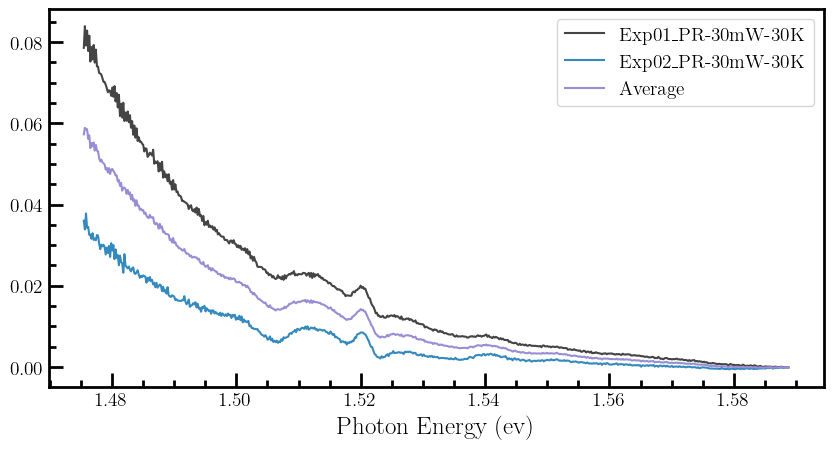

In [35]:
class pardata(object): pass
p = pardata() # this will be our datastructure
p.exp = expm43140
p.ini = 0
p.fin = 2
p.setdata = 7
p.printf = 'yes'

data = p
setexp  = expimport(data).analisis()
avx     = setexp.avx
avrasp1   = setexp.avras
avrp     = setexp.avr
#data    =  setexp.data
fn      = setexp.filesnames
plt.plot(avx,avrasp1,label="Average")
plt.legend()
plt.show()